# King County Housing Data – Exploratory Data Analysis (EDA)

This notebook explores the King County Housing dataset.  
The goal is to understand the data, find patterns, validate hypotheses, and provide insights and recommendations for a client.

We will follow the EDA checklist:

1. Understanding  
2. Hypothesis  
3. Explore  
4. Clean  
5. Relationships  
6. Back to the Hypothesis  
7. Fine Tune  
8. Explain  


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings (optional, simple)
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


## 1. Understanding the Data

We check the structure, column names, and data types.

- read the csv sales & detals 


In [91]:
# run this to read the data, do not modify overwriting!
sales = pd.read_csv("data/king_county_house_sales_202512091732.csv")
details = pd.read_csv("data/king_county_house_details_202512091731.csv")

- Check head() & Info()

In [92]:
# check head and info of both dataframes
sales.info()
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      21597 non-null  object 
 1   price     21597 non-null  float64
 2   house_id  21597 non-null  int64  
 3   id        21597 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 675.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   bedrooms       21420 non-null  float64
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  float64
 4   sqft_lot       21420 non-null  float64
 5   floors         21420 non-null  float64
 6   waterfront     19060 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21420 non-null  int64  
 

In [93]:
# Check the data types of the 'id' columns in both dataframes
print(sales['id'].dtype, details['id'].dtype)
print(sales['id'].head())
print(details['id'].head())

int64 int64
0    1
1    2
2    3
3    4
4    5
Name: id, dtype: int64
0       1000102
1     100100050
2    1001200035
3    1001200050
4    1003000175
Name: id, dtype: int64


- Merge from the **sales** the "house_id to **detail** "id"

In [94]:
# Merge from the sales "house_id to detail "id"
df = sales.merge(details, 
left_on="house_id", 
right_on="id", how="left")

print(df.shape)
df.head()

(21597, 23)


,date,price,house_id,id_x,id_y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,7129300520,1,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,6414100192,2,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,5631500400,3,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,2487200875,4,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,1954400510,5,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0


- change the names to the repo proposed "Column Names and descriptions for King County Data Set" file column_names.md

In [95]:
df.rename(columns={
    "id_y": "id",                       # y is ID from details
    "id_x": "sales_id",                  # x is ID from sales, kept for reference
    "house_id": "house_id",              # original house_id from sales, optional
    "date": "dateDate",                  # sales date "dateDate" house was sold
    "price": "pricePrice",               # is prediction target
    "bedrooms": "bedroomsNumber",        # number of bedrooms
    "bathrooms": "bathroomsNumber",      # number of bathrooms
    "sqft_living": "sqft_livingsquare", # footage of the home
    "sqft_lot": "sqft_lotsquare",       # footage of the lot
    "floors": "floorsTotal",            # floors (levels) in house
    "waterfront": "waterfront",         # house with waterfront view
    "view": "view",                      # quality of view
    "condition": "condition",            # overall condition rating
    "grade": "grade",                    # overall grade (King County system)
    "sqft_above": "sqft_above",          # square footage above basement
    "sqft_basement": "sqft_basement",    # square footage basement
    "yr_built": "yr_built",              # year built
    "yr_renovated": "yr_renovated",      # year renovated
    "zipcode": "zipcode",                # zip code
    "lat": "lat",                        # latitude
    "long": "long",                      # longitude
    "sqft_living15": "sqft_living15",    # living area of 15 nearest neighbors
    "sqft_lot15": "sqft_lot15"           # lot area of 15 nearest neighbors
}, inplace=True)



In [96]:
print(list(df.columns)) # take columns as list

['dateDate', 'pricePrice', 'house_id', 'sales_id', 'id', 'bedroomsNumber', 'bathroomsNumber', 'sqft_livingsquare', 'sqft_lotsquare', 'floorsTotal', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [97]:
print(df.head())

     dateDate  pricePrice    house_id  sales_id          id  bedroomsNumber  \
0  2014-10-13    221900.0  7129300520         1  7129300520             3.0   
1  2014-12-09    538000.0  6414100192         2  6414100192             3.0   
2  2015-02-25    180000.0  5631500400         3  5631500400             2.0   
3  2014-12-09    604000.0  2487200875         4  2487200875             4.0   
4  2015-02-18    510000.0  1954400510         5  1954400510             3.0   

   bathroomsNumber  sqft_livingsquare  sqft_lotsquare  floorsTotal  \
0             1.00             1180.0          5650.0          1.0   
1             2.25             2570.0          7242.0          2.0   
2             1.00              770.0         10000.0          1.0   
3             3.00             1960.0          5000.0          1.0   
4             2.00             1680.0          8080.0          1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0         NaN   0.0       

In [ ]:
# check if house_id in sales unique is 
print("Sales house_id unique?", sales['house_id'].is_unique)

# check the same in details 
print("Details id unique?", details['id'].is_unique)

# adiitional -> check also Sales- ID 
print("Sales id unique?", sales['id'].is_unique)

Sales house_id unique? False
Details id unique? True
Sales id unique? True


## 2. Hypotheses

Before exploring the data, here are some assumptions:

1. Houses closer to the water are more expensive.
2. Houses with more bedrooms and bathrooms have higher prices.
3. Some ZIP codes might form “rich neighborhoods”.
4. Newer, renovated houses should have higher prices.

These will be tested during EDA.


## overview bort
- used miro bort to collect all information 
https://miro.com/app/board/uXjVGd0Xl8o=/

## 3. Explore the Data

We look for:
- Missing values  
- Outliers  
- Strange values  
- Distribution of key columns  


In [98]:
sales.isna().sum(), details.isna().sum()


(date        0
 price       0
 house_id    0
 id          0
 dtype: int64,
 id                  0
 bedrooms            0
 bathrooms           0
 sqft_living         0
 sqft_lot            0
 floors              0
 waterfront       2360
 view               63
 condition           0
 grade               0
 sqft_above          0
 sqft_basement     451
 yr_built            0
 yr_renovated     3811
 zipcode             0
 lat                 0
 long                0
 sqft_living15       0
 sqft_lot15          0
 dtype: int64)

In [99]:
sales.describe()

,price,house_id,id
count,2.159700e+04,2.159700e+04,21597.000000
mean,5.402966e+05,4.580474e+09,10799.000000
std,3.673681e+05,2.876736e+09,6234.661218
min,7.800000e+04,1.000102e+06,1.000000
25%,3.220000e+05,2.123049e+09,5400.000000
50%,4.500000e+05,3.904930e+09,10799.000000
75%,6.450000e+05,7.308900e+09,16198.000000
max,7.700000e+06,9.900000e+09,21597.000000


In [100]:
df = sales.merge(details, on="id", how="left")
df.head()

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,7129300520,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-09,538000.0,6414100192,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-25,180000.0,5631500400,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-09,604000.0,2487200875,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-02-18,510000.0,1954400510,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:

# count columns before and after merge
print(sales.shape, details.shape, df.shape)

# now we need to check if we have big delta in number of rows
# (e.g. doubling → indication of duplicates in details)

(21597, 4) (21420, 19) (21597, 22)


sales.shape   -> (21597, 4) -> colums 

details.shape -> (21420, 19)

df.shape      -> (21597, 22) -> colums same = 21597, row 4+19-1=22 

In [112]:
# IDs without match
ids_sales = set(sales['id'])
ids_details = set(details['id'])
ids_unmatched = ids_sales - ids_details

print(f"Unmatched IDs (sales but not in details): {len(ids_unmatched)}")

Unmatched IDs (sales but not in details): 21597


In [113]:
# check the dataframe in both datasets
print("Sales dtypes:")
print(sales.dtypes)
print("\nDetails dtypes:")
print(details.dtypes)

# Ocheck some of this in it is numbers
print("\nSales house_id sample:")
print(sales['house_id'].head())
print("\nDetails id sample:")
print(details['id'].head())

# check if axis are numbers
print("\nSales house_id is numeric?", pd.api.types.is_numeric_dtype(sales['house_id']))
print("Details id is numeric?", pd.api.types.is_numeric_dtype(details['id']))

Sales dtypes:
date         object
price       float64
house_id      int64
id            int64
dtype: object

Details dtypes:
id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

Sales house_id sample:
0    7129300520
1    6414100192
2    5631500400
3    2487200875
4    1954400510
Name: house_id, dtype: int64

Details id sample:
0       1000102
1     100100050
2    1001200035
3    1001200050
4    1003000175
Name: id, dtype: int64

Sales house_id is numeric? True
Details id is numeric? True


 This mean we need to find the correct id's and match this. We will use the sale list and extent with the information from detail list

In [103]:
df_inner = sales.merge(details, on="id", how="inner")
print("Inner join shape:", df_inner.shape)

loss_rate = 1 - len(df_inner) / len(sales)
print(f"Rows lost with inner join (sales not matched): {loss_rate:.2%}")

Inner join shape: (0, 22)
Rows lost with inner join (sales not matched): 100.00%


! the id's are not correct! need to find the Id header which are match together 

In [104]:
sales.head()
details.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.0,3.0,2400.0,9373.0,2.0,NaN,0.0,3,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,100100050,3.0,1.0,1320.0,11090.0,1.0,0.0,0.0,3,7,1320.0,0.0,1955,0.0,98155,47.7748,-122.304,1320.0,8319.0
2,1001200035,3.0,1.0,1350.0,7973.0,1.5,NaN,0.0,3,7,1350.0,0.0,1954,0.0,98188,47.4323,-122.292,1310.0,7491.0
3,1001200050,4.0,1.5,1260.0,7248.0,1.5,NaN,0.0,5,7,1260.0,0.0,1955,NaN,98188,47.4330,-122.292,1300.0,7732.0
4,1003000175,3.0,1.0,980.0,7606.0,1.0,0.0,0.0,3,7,980.0,0.0,1954,0.0,98188,47.4356,-122.290,980.0,8125.0


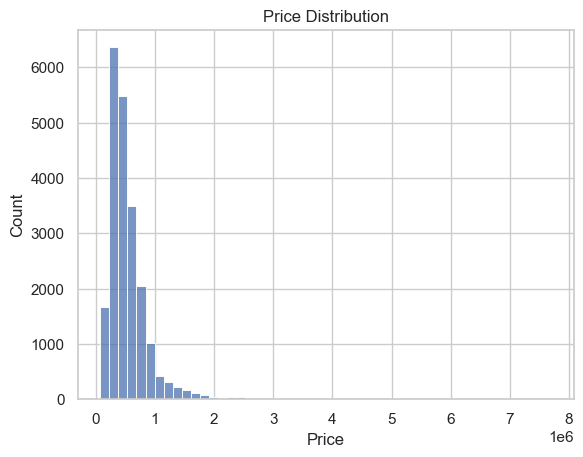

In [105]:
sns.histplot(df["price"], bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

## 4. Cleaning the Data

We check:
- Incorrect values  
- Missing values  
- Outliers  
- Whether we need to transform variables (log, categories, etc.)


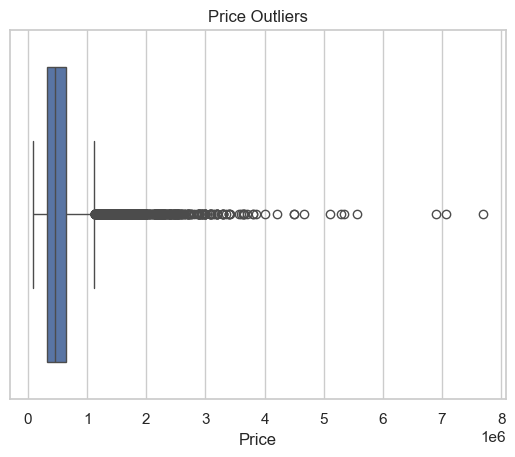

In [106]:
sns.boxplot(x=df["price"])
plt.title("Price Outliers")
plt.xlabel("Price")
plt.show()


## 5. Relationships

We explore correlations between variables.


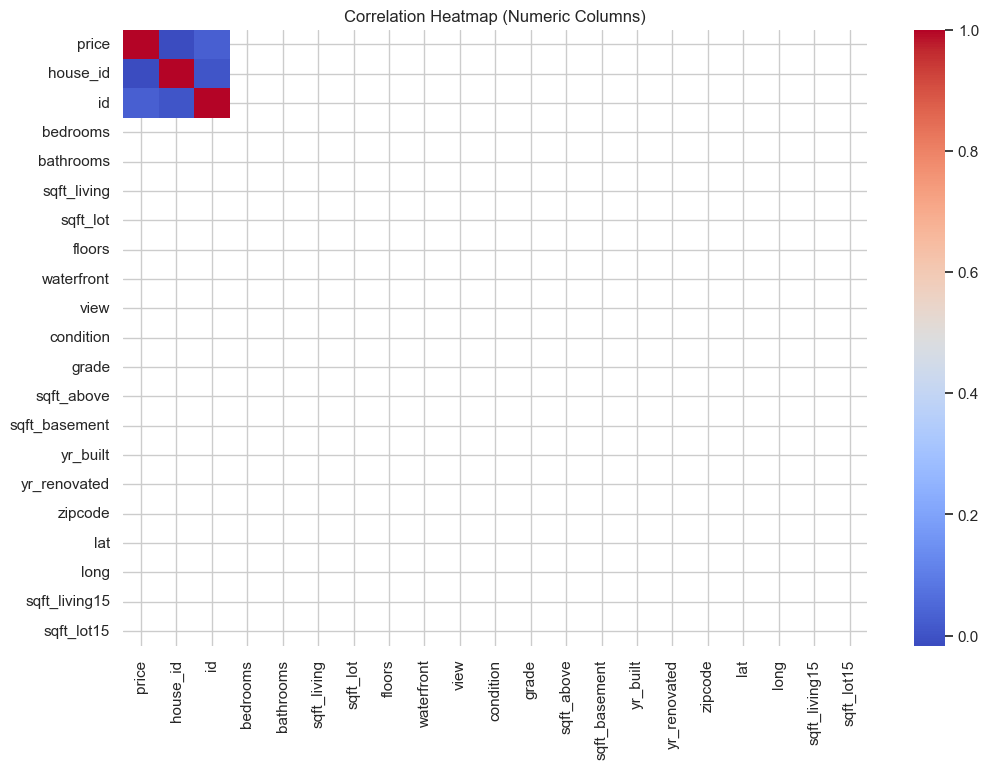

In [111]:
plt.figure(figsize=(12,8))
# Select numeric columns to avoid errors
numeric_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()


## 6. Back to the Hypotheses

We check if our assumptions are true or not and update them if necessary.


In [115]:
sns.scatterplot(data=df, x="sqft_livingsquare", y="pricePrice")
plt.title("Living Area vs Price")
plt.xlabel("Square Feet Living")
plt.ylabel("Price")
plt.show()


ValueError: Could not interpret value `sqft_livingsquare` for `x`. An entry with this name does not appear in `data`.

In [110]:
df["sqft_livingsquare"].min(), df["sqft_livingsquare"].max(), df["pricePrice"].min(), df["pricePrice"].max()


KeyError: 'sqft_livingsquare'

In [ ]:
df[["sqft_livingsquare", "pricePrice"]].describe()

,sqft_livingsquare,pricePrice
count,0.0,2.159700e+04
mean,NaN,5.402966e+05
std,NaN,3.673681e+05
min,NaN,7.800000e+04
25%,NaN,3.220000e+05
50%,NaN,4.500000e+05
75%,NaN,6.450000e+05
max,NaN,7.700000e+06


In [ ]:
df.columns


Index(['dateDate', 'pricePrice', 'house_id', 'id', 'bedroomsNumber',
       'bathroomsNumber', 'sqft_livingsquare', 'sqft_lotsquare', 'floorsTotal',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df['sqft_livingsquare'].isna().sum()

np.int64(21597)

In [ ]:
df["sqft_livingsquare"].isna().sum(), len(df)

(np.int64(21597), 21597)

In [ ]:
sales.house_id.head(), details.id.head()

(0    7129300520
 1    6414100192
 2    5631500400
 3    2487200875
 4    1954400510
 Name: house_id, dtype: int64,
 0       1000102
 1     100100050
 2    1001200035
 3    1001200050
 4    1003000175
 Name: id, dtype: int64)

In [ ]:
df.filter(regex="sqft", axis=1).head()

,sqft_livingsquare,sqft_lotsquare,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


## 7. Fine Tune

Remove unnecessary plots, make visuals clear, add labels, and prepare clean results for the client.


## 8. Explain – Insights & Recommendations

### Conclusion how to use the data 

ID Usage Summary – King County Housing Data

**sales_id:** Represents each individual transaction. Use this for plots and analyses that focus on all sales, such as overall price distributions, time series of sales, or histograms.

**house_id:** Represents the unique property. Use this to track house-specific trends over time, e.g., price changes for the same house, effects of renovations, or neighborhood comparisons.

**Best practice:**

For overall sales analysis, use sales_id.

For per-house trend analysis, group or merge using house_id.

You can combine both: use house_id as the grouping key and sales_id as the index to preserve the full transaction history.

This ensures clarity, avoids duplicates, and allows flexible analysis for both individual transactions and property-specific trends.

### Insights (at least 3)
- Insight 1  
- Insight 2  
- Insight 3  

### Geographic Insight
- ZIP code or location-based finding  

### Recommendations (at least 3)
- Rec 1  
- Rec 2  
- Rec 3  

Client chosen: **(your choice)**


## 9. Used information & links 
- https://www.unitedstateszipcodes.org/98101/ # detail information about the region and statistical values